In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import re
import string

In [2]:
data = pd.read_csv("news_summary_more.csv")

In [3]:
data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [4]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
"didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
"he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
"I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
"i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
"mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
"mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
"oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
"she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
"should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
"this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
"they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
"wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
"we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
"what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
"where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
"why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
"y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
"you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"}

In [5]:
from nltk.corpus import stopwords
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from sklearn.model_selection import train_test_split

In [6]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
StopWords = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower() #converting input to lowercase
    text = re.sub(r'\([^)]*\)', '', text) #Removing punctuations and special characters.
    text = re.sub('"','', text) #Removing double quotes.
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #Replacing contractions.   
    text = re.sub(r"'s\b","",text) #Eliminating apostrophe.
    text = re.sub("[^a-zA-Z]", " ", text) #Removing non-alphabetical characters
    text = ' '.join([word for word in text.split() if word not in StopWords]) #Removing stopwords.
    text = ' '.join([word for word in text.split() if len(word) >= 3]) #Removing very short words
    return text


In [8]:
cleaned_text = []
cleaned_summary = []
for text in data['text']:
    cleaned_text.append(preprocess(text))
for summary in data['headlines']:
    cleaned_summary.append(preprocess(summary))
cleaned_data = pd.DataFrame()
cleaned_data['text'] = cleaned_text
cleaned_data['headline'] = cleaned_summary

#Replacing empty string summaries with nan values and then dropping those datapoints.
cleaned_data['headline'].replace('', np.nan, inplace=True)
cleaned_data.dropna(axis=0, inplace=True)

In [9]:
cleaned_data['headline'] = cleaned_data['headline'].apply(lambda x: '<START>' + ' '+ x + ' '+ '<END>')
for i in range(10):
    print('Article: ', cleaned_data['text'][i])
    print('Headline:', cleaned_data['headline'][i])
    print('\n')

Article:  saurav kant alumnus upgrad iiit program machine learning artificial intelligence systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers
Headline: <START> upgrad learner switches career salary hike <END>


Article:  kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit
Headline: <START> delhi techie wins free food swiggy one year cred <END>


Article:  new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history
Headline

In [10]:
import pandas as pd

# Assuming you've loaded or created 'cleaned_data' DataFrame before this point
news_length = max([len(text.split()) for text in cleaned_data['text']])
headline_length = max([len(text.split()) for text in cleaned_data['headline']])
print(news_length, headline_length)

53 14


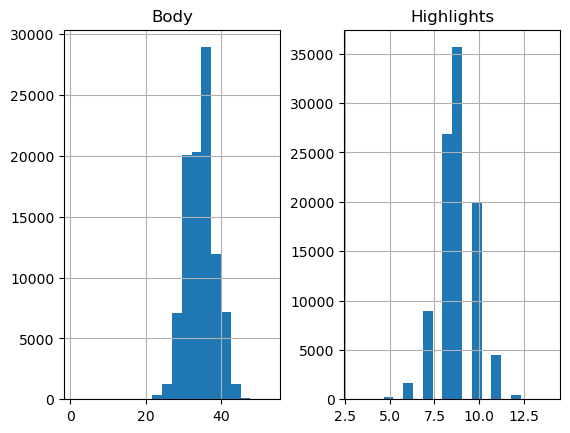

In [11]:
import matplotlib.pyplot as plt

text_word_count = []
headline_word_count = []

for i in cleaned_data['text']:
      text_word_count.append(len(i.split()))

for i in cleaned_data['headline']:
      headline_word_count.append(len(i.split()))

length_df = pd.DataFrame({'Body':text_word_count, 'Highlights':headline_word_count})
length_df.hist(bins = 20)
plt.show()


In [12]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [20]:
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tejak\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [24]:
import keras
from keras import backend as K
from keras.layers import Layer
from keras.layers import Concatenate
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, TimeDistributed, LSTM, Embedding, Input
from keras import Model

In [25]:
data['processed_text'] = data['headlines'].apply(preprocess_text)

In [26]:
all_words = ' '.join(data['processed_text']).split()
word_freq = nltk.FreqDist(all_words)

In [27]:
X = data['processed_text']
y = data['text']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Keras tokenizer for news text.
tokenizer_news = Tokenizer()
tokenizer_news.fit_on_texts(list(X_train))
x_train_seq = tokenizer_news.texts_to_sequences(X_train)
x_test_seq = tokenizer_news.texts_to_sequences(X_test)
#padding short texts with 0s.
x_train_pad = pad_sequences(x_train_seq, maxlen=news_length, padding='post') 
x_test_pad = pad_sequences(x_test_seq, maxlen=news_length, padding='post')
#Vocab size of texts.
news_vocab = len(tokenizer_news.word_index) + 1

#Keras Tokenizer for summaries.
tokenizer_headline = Tokenizer()
tokenizer_headline.fit_on_texts(list(y_train))
y_train_seq = tokenizer_headline.texts_to_sequences(y_train)
y_test_seq = tokenizer_headline.texts_to_sequences(y_test)
y_train_pad = pad_sequences(y_train_seq, maxlen=headline_length, padding='post')
y_test_pad = pad_sequences(y_test_seq, maxlen=headline_length, padding='post')
#Vocab size of summaries.
headline_vocab = len(tokenizer_headline.word_index) + 1

In [28]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)  

    def call(self, inputs, verbose=False):
    
        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state
            
            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)  
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state
        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1]) 

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors 
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]
        

In [29]:
K.clear_session()

embedding_dim = 300 #Size of word embeddings.
latent_dim = 500 #Number of neurons in LSTM layer.

#Embedding Layer
e_input = Input(shape=(news_length, ))
e_emb = Embedding(news_vocab, embedding_dim, trainable=True)(e_input) 

#Three LSTM layers ----> encoder.
e_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
y_1, a_1, c_1 = e_lstm1(e_emb)
e_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
y_2, a_2, c_2 = e_lstm2(y_1)
e_lstm3 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
encoder_output, a_enc, c_enc = e_lstm3(y_2)

#Single LSTM layer ----> decoder 
d_input = Input(shape=(None,))
d_emb = Embedding(headline_vocab, embedding_dim, trainable=True)(d_input)
d_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
decoder_output, decoder_fwd, decoder_back = d_lstm(d_emb, initial_state=[a_enc, c_enc]) #Final output states of encoder last layer are fed into decoder.

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_output, decoder_output]) 

#concatenating decoder input to attention layer output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_output, attn_out])
#dense time distributed layer with softw=max fucntion for predicting the next word
decoder_dense = TimeDistributed(Dense(headline_vocab, activation='softmax'))
decoder_output = decoder_dense(decoder_concat_input)

#creating model
model = Model([e_input, d_input], decoder_output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 53)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 53, 300)              1088730   ['input_1[0][0]']             
                                                          0                                       
                                                                                                  
 lstm (LSTM)                 [(None, 53, 500),            1602000   ['embedding[0][0]']           
                              (None, 500),                                                        
                              (None, 500)]                                                    

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history=model.fit([x_train_pad,y_train_pad[:,:-1]], y_train_pad.reshape(y_train_pad.shape[0],y_train_pad.shape[1], 1)[:,1:] ,epochs=3,callbacks=[callback],batch_size=512, validation_data=([x_test_pad,y_test_pad[:,:-1]], y_test_pad.reshape(y_test_pad.shape[0],y_test_pad.shape[1], 1)[:,1:]))

In [ ]:
encoder_model = Model(inputs=e_input, outputs=[encoder_output, a_enc, c_enc])

#Initialising state vectors for decoder.
decoder_initial_state_a = Input(shape=(latent_dim,))
decoder_initial_state_c = Input(shape=(latent_dim,))
decoder_hidden_state = Input(shape=(news_length, latent_dim))

#Decoder inference model
decoder_out, decoder_a, decoder_c = d_lstm(d_emb, initial_state=[decoder_initial_state_a, decoder_initial_state_c])
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state, decoder_out])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_out, attn_out_inf])

decoder_final = decoder_dense(decoder_inf_concat)
decoder_model = Model([d_input]+[decoder_hidden_state, decoder_initial_state_a, decoder_initial_state_c], [decoder_final]+[decoder_a, decoder_c])

In [ ]:
def decoded_sequence(input_seq):
    encoder_out, encoder_a, encoder_c = encoder_model.predict(input_seq) #Collecting output from encoder inference model.
    #Initialise input to decoder neuron with START token. Thereafter output token predicted by each neuron will be used as input for the subsequent.
    #Single elt matrix used for maintaining dimensions.
    next_input = np.zeros((1,1))
    next_input[0,0] = tokenizer_headline.word_index['start']
    output_seq = ''
    #Stopping condition to terminate loop when one summary is generated.
    stop = False
    while not stop:
        #Output from decoder inference model, with output states of encoder used for initialisation.
        decoded_out, trans_state_a, trans_state_c = decoder_model.predict([next_input] + [encoder_out, encoder_a, encoder_c])
        #Get index of output token from y(t) of decoder.
        output_idx = np.argmax(decoded_out[0, -1, :])
        #If output index corresponds to END token, summary is terminated without of course adding the END token itself.
        if output_idx == tokenizer_headline.word_index['end']: 
            stop = True
        elif output_idx>0 and output_idx != tokenizer_headline.word_index['start'] :
            output_token = tokenizer_headline.index_word[output_idx] #Generate the token from index.
            output_seq = output_seq + ' ' + output_token #Append to summary
        
        #Pass the current output index as input to next neuron.
        next_input[0,0] = output_idx
        #Continously update the transient state vectors in decoder.
        encoder_a, encoder_c = trans_state_a, trans_state_c
        
    return output_seq       

In [ ]:
predicted = []
for i in range(20):
    print('Information:', X_test.iloc[i])
    print('Actual Headline:', y_test.iloc[i])
    print('Predicted Headline:', decoded_sequence(x_test_pad[i].reshape(1, news_length)))
    predicted.append(decoded_sequence(x_test_pad[i].reshape(1, news_length)).split())

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
df = pd.DataFrame(columns=['Information', 'Actual Headline', 'Predicted Headline'])

for i in range(10):
    information = X_test.iloc[i]
    actual_headline = y_test.iloc[i]
    predicted_headline = decoded_sequence(x_test_pad[i].reshape(1, news_length))
    predicted.append(predicted_headline.split())

    row = {'Information': information, 'Actual Headline': actual_headline, 'Predicted Headline': predicted_headline}
    df = df.append(row, ignore_index=True)

display(data)

In [ ]:
references = []
for summ in summaries:
    ref = summ.split()
    if '<START>' in ref:
        ref.remove('<START>')
    if '<END>' in ref:
        ref.remove('<END>')
    references.append(ref)


In [ ]:
pd.set_option('display.max_colwidth', None)
df = pd.DataFrame(columns=['Actual Headline','Predicted Headline', 'BLEU Score'])
refs = []
smooth = SmoothingFunction().method4
for i in range(10):
    refs.append(references[i])
    predicted_headline = predicted[i]
    bleu_score = sentence_bleu(refs, predicted_headline, weights=(0.25,0.25,0.25,0.25))

    row = {'Actual Headline':refs,'Predicted Headline': predicted[i], 'BLEU Score': sentence_bleu(refs, predicted[i], weights=(0.25,0.25,0.25,0.25))}
    df = df.append(row, ignore_index=True)

    refs = []  # reset refs to an empty list for the next iteration

display(df.sort_values(by='BLEU Score', ascending=False))